In [1]:
# Load the Tidyverse

library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Use the `pull` function to extract the `class` column from the `mpg` data set. Capture this column into a variable named `class_col`.

In [19]:
class_col = mpg |> pull(class)

Run the code below to turn `class_col` into a factor and view the default levels.

In [20]:
factor(class_col) %>% levels()

[1] "2seater"    "compact"    "midsize"    "minivan"    "pickup"    
[6] "subcompact" "suv"

Let's turn `class_col` into a factor but manipulate the order of the levels with `forcats`!

First, use the `table` command to count the frequency of each value in `class_col`.

In [4]:
class_col %>% table

.
   2seater    compact    midsize    minivan     pickup subcompact        suv 
         5         47         41         11         33         35         62 

Pipe `class_col` into the `fct_infreq` function to turn `class_col` into a factor and order the levels by ☝️frequency. Are the levels in the order you expected?

In [21]:
mpg |> count(class)

class,n
<chr>,<int>
2seater,5
compact,47
midsize,41
minivan,11
pickup,33
subcompact,35
suv,62


In [22]:
class_col |> fct_infreq() |> levels()

class_col |> head()

[1] "suv"        "compact"    "midsize"    "subcompact" "pickup"    
[6] "minivan"    "2seater"

[1] "compact" "compact" "compact" "compact" "compact" "compact"

Group the low frequency levels into an "Other" category using `fct_lump`. Set the `n` argument to **five**.

In [24]:
col_name = class_col |> fct_lump(n = 5) |> levels()

## Bonus

Can you group low frequency values and sort the levels by frequency?

In [ ]:
class_col |> fct_lump(n = 5) |> fct_infreq() |> levels()

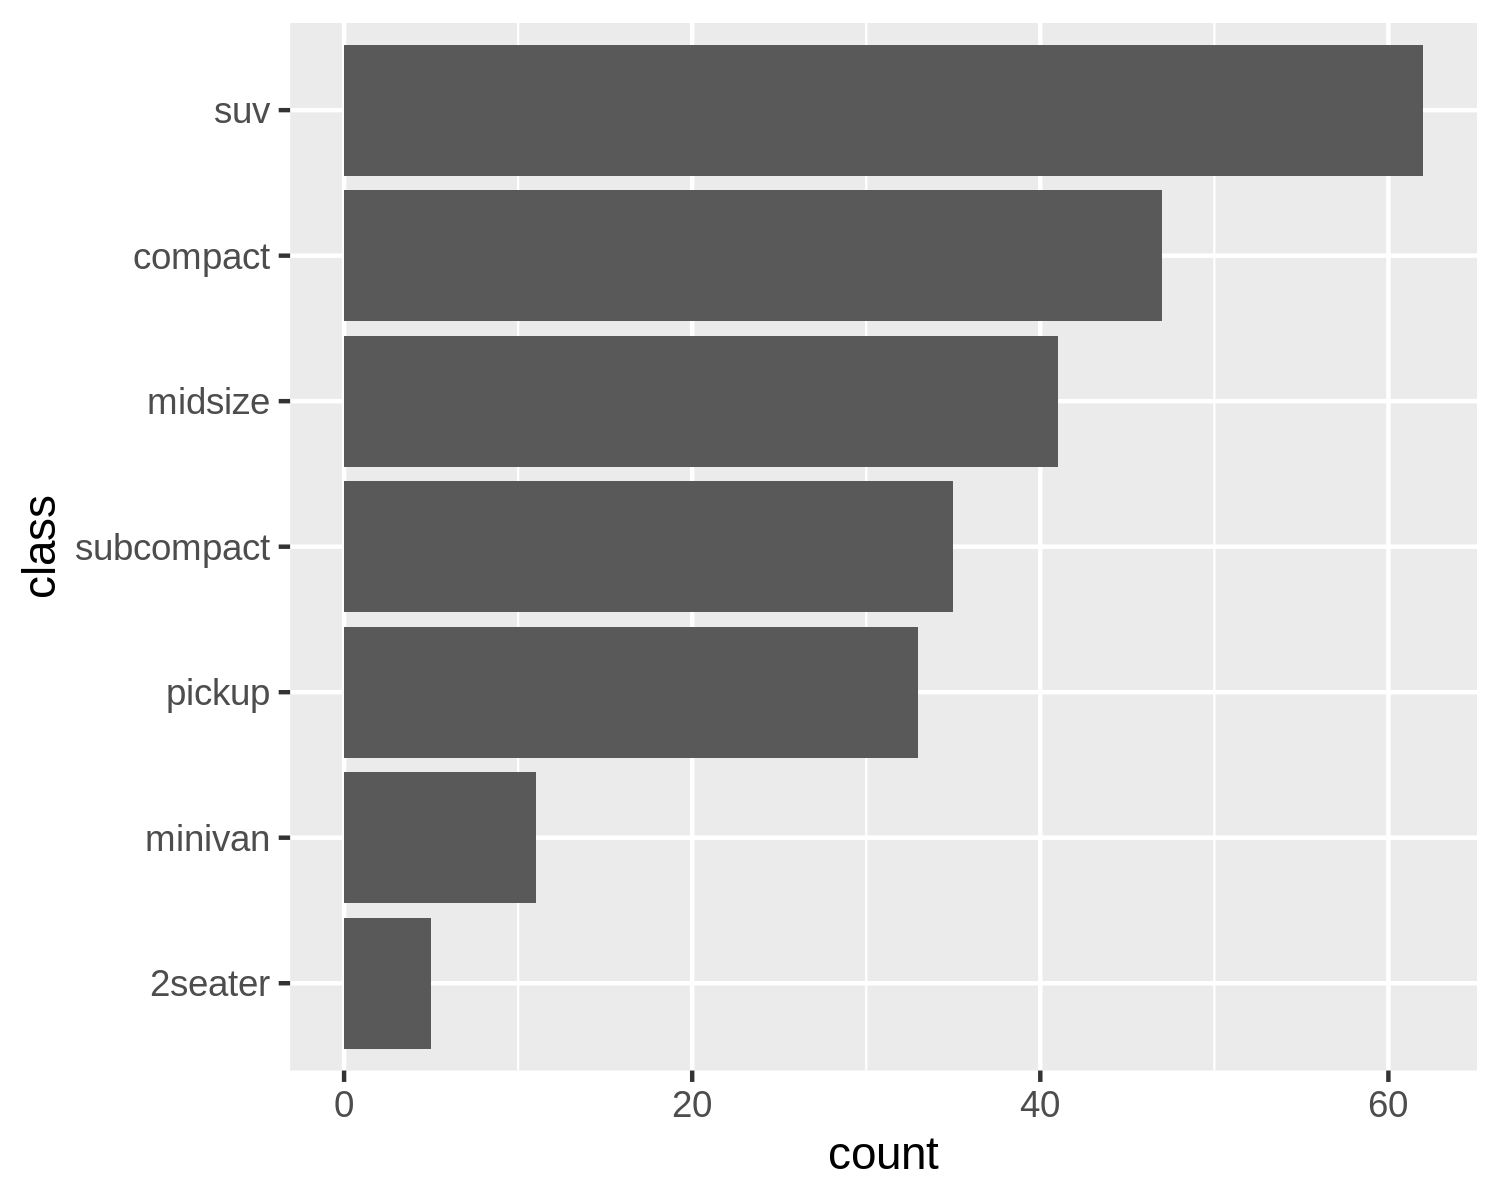

In [26]:
mpg2 = mpg |> 
    group_by(class) |>
    mutate(class_freq = n()) |>
    ungroup() |>
    arrange(desc(class_freq)) |>
    mutate(class = class |> fct_inorder() |> fct_rev())

p = ggplot(mpg2, aes(y = class)) + geom_bar()

p